Initial setup

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [6]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [7]:
wos_config = wosis.load_config('config.yml')

Searching for best practices

In [18]:
best_practice = wosis.keyword_matches(RC, ['best practice', 'good practice', 'best practise', 'good practise'], threshold=95.0)

In [19]:
all_bp = best_practice.combine_recs()

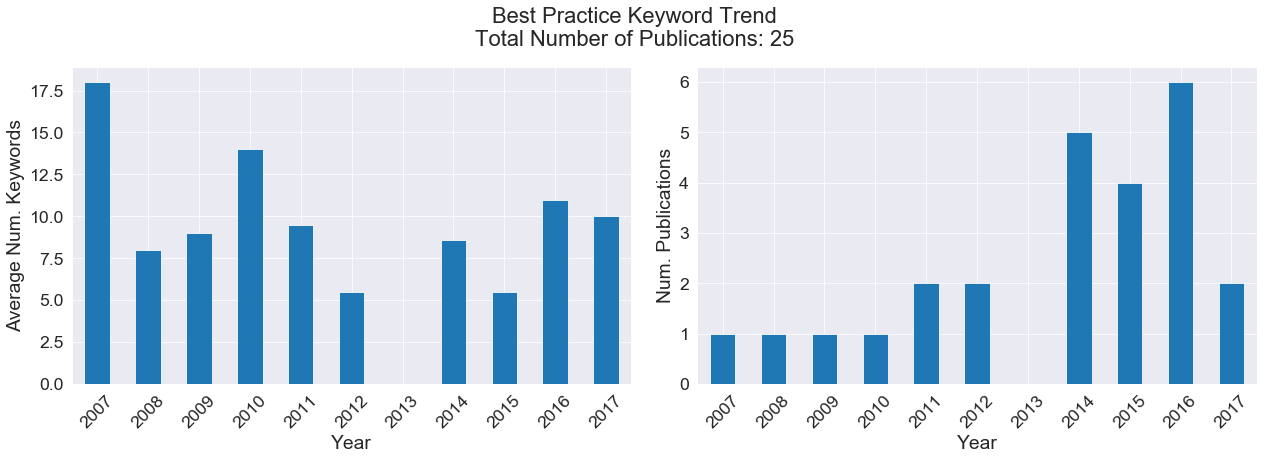

In [20]:
wos_plot.plot_kw_trend(all_bp, title='Best Practice Keyword Trend', save_plot_fn='figs/bp_kw_trend.png')

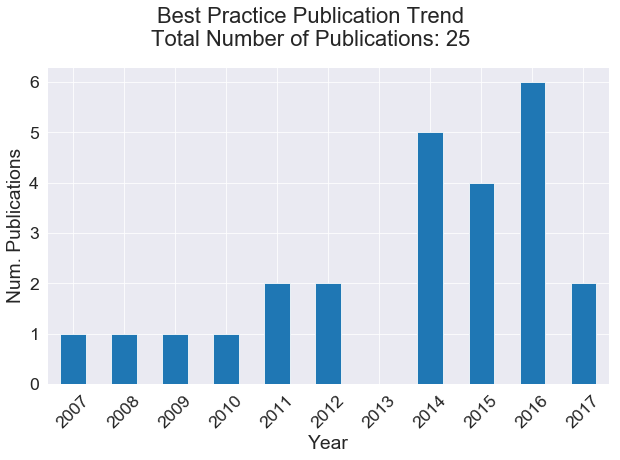

In [21]:
wos_plot.plot_pub_trend(all_bp, title='Best Practice Publication Trend', save_plot_fn='figs/bp_pub_trend.png')

<hr> Running a key-phrase extraction on best practices to identify the fields using this method.

In [22]:
bp_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_bp))

In [23]:
bp_phrases.display_phrases()

Quantitative risk assessment of CO2 transport by pipelines-A review of uncertainties and their impacts (2010) 
https://dx.doi.org/10.1016/j.jhazmat.2009.11.068 

A systematic assessment, based on an extensive literature review, of the impact of gaps and uncertainties on the results of quantitative risk assessments (QRAs) for CO pipelines is presented. 

It is concluded that QRA for CO pipelines can be improved by validation of release and dispersion models for high-pressure CO releases, definition and adoption of a universal dose-effect relationship and development of a good practice guide for QRAs for CO pipelines. 

In existing studies this range is found to be between < m and . 


From the LCA of food products to the environmental assessment of protected crops districts: A case-study in the south of Italy (2012) 
https://dx.doi.org/10.1016/j.jenvman.2011.08.019 

In the present study, Life Cycle Assessment (LCA) methodology was applied to evaluate the energy consumption and environm

The quantitative results show that the model outcomes are very sensitive to uncertainty in both vulnerability (i.e. 


Best practices for conceptual modelling in environmental planning and management (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.02.023 

Due to their sometimes apparent simplicity, development and use of a conceptual model is often an attractive option when tackling an environmental problem situation. 


Sensitivity Analysis in a Complex Marine Ecological Model (2015) 
https://dx.doi.org/10.3390/w7052060 

SA is a commonly used approach for identifying important parameters that dominate model behavior. 

As such, SA address two elementary questions in the modeling exercise, namely, how sensitive is the model to changes in individual parameter values, and which parameters or associated processes have more influence on the results. 

Also, the color-code matrix methodology proved to be effective for a clear identification of the parameters with most impact on selected

Personal devices have been increasingly employed over time, whereas norms for the measurement of respirable dust have been defined only recently. 


From screening to quantitative sensitivity analysis. A unified approach (2011) 
https://dx.doi.org/10.1016/j.cpc.2010.12.039 

Given the similarity between the total sensitivity index and a screening test known as method of the elementary effects (or method of Morris), we test the radial design on this method. 

Both methods are best practices: the total sensitivity index in the class of the quantitative measures and the elementary effects in that of the screening methods. 

OAT is a radial design of size one. 

Both concepts belong to sensitivity analysis of model output. 

A radial design is the one whereby starting from a random point in the hyperspace of the input factors one step in turn is taken for each factor. 


A balanced calibration of water quantity and quality by multi-objective optimization for integrated water system model (

<hr> Top-cited journals for best practice

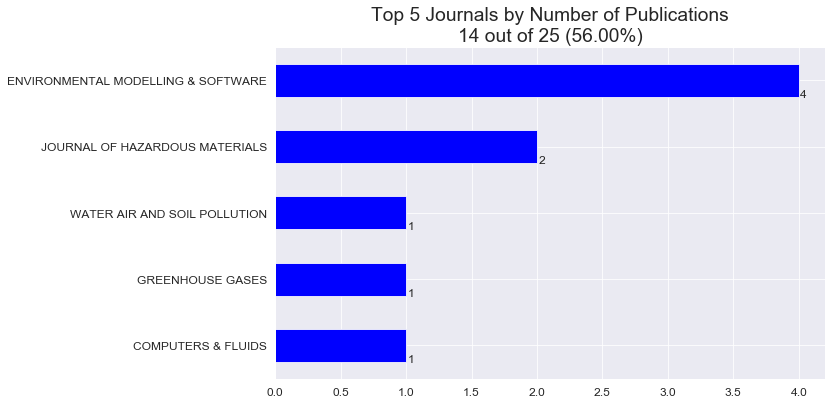

In [24]:
wos_plot.plot_pubs_per_journal(all_bp, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/bp_journal_pubs.png')

In [25]:
journals_of_interest_bp = ['Environmental Modelling & Software'.upper(), 'Journal of Hazardous Materials'.upper(), 'Water Air and Soil Pollution'.upper(), 'Greenhouse Gases'.upper(), 'Computers & Fluids'.upper()]
pubs_for_journals_bp = wosis.find_pubs_by_journal(all_bp, journals_of_interest_bp)

In [26]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_bp = {}
for pubs in pubs_for_journals_bp:
    paper_citations_per_journal_bp[pubs] = wosis.get_num_citations(pubs_for_journals_bp[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5C6asKsG5bXfL3wxOfL)



Authenticated (SID: 5DmuEbMDrR1CTSh7wPx)



Authenticated (SID: 5CYtrmibraNB3UWuSiO)



Authenticated (SID: 8Fn9UchVRLdlJ4mGTXN)


In [27]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_bp = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_bp.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_bp = collection_bp.append(df[cols_of_interest][0:10], ignore_index=True)

In [28]:
top_cited_in_top_journals_bp = collection_bp.sort_values('citations', ascending=False)
top_cited_in_top_journals_bp.head(10)

,AU,year,title,journal,citations,DOI link
2,"Pianosi, F|Beven, K|Freer, J|Hall, JW|Rougier,...",2016,Sensitivity analysis of environmental models: ...,ENVIRONMENTAL MODELLING & SOFTWARE,132,https://dx.doi.org/10.1016/j.envsoft.2016.02.008
0,"Koornneef, J|Spruijt, M|Molag, M|Ramirez, A|Tu...",2010,Quantitative risk assessment of CO2 transport ...,JOURNAL OF HAZARDOUS MATERIALS,58,https://dx.doi.org/10.1016/j.jhazmat.2009.11.068
3,"Zoras, S|Triantafyllou, AG|Hurley, PJ",2007,Grid sensitivity analysis for the calibration ...,ENVIRONMENTAL MODELLING & SOFTWARE,15,https://dx.doi.org/10.1016/j.envsoft.2005.09.010
4,"Argent, RM|Sojda, RS|Guipponi, C|McIntosh, B|V...",2016,Best practices for conceptual modelling in env...,ENVIRONMENTAL MODELLING & SOFTWARE,6,https://dx.doi.org/10.1016/j.envsoft.2016.02.023
6,"Abdalla, M|Hastings, A|Bell, MJ|Smith, JU|Rich...",2014,Simulation of CO2 and Attribution Analysis at ...,WATER AIR AND SOIL POLLUTION,5,https://dx.doi.org/10.1007/s11270-014-2182-8
5,"Humphrey, GB|Maier, HR|Wu, WY|Mount, NJ|Dandy,...",2017,Improved validation framework and R-package fo...,ENVIRONMENTAL MODELLING & SOFTWARE,4,https://dx.doi.org/10.1016/j.envsoft.2017.01.023
7,"Capone, L|Benhamadouche, S|Hassan, YA",2016,Source terms modeling for spacer grids with mi...,COMPUTERS & FLUIDS,3,https://dx.doi.org/10.1016/j.compfluid.2015.11...
1,"Yan, HH|Guo, H|Ou, JM",2014,Emissions of halocarbons from mobile vehicle a...,JOURNAL OF HAZARDOUS MATERIALS,2,https://dx.doi.org/10.1016/j.jhazmat.2014.06.020


In [29]:
top_cited_in_top_journals_bp.to_csv('../data/top_cited_bp_papers.csv')

<hr> Topic trend

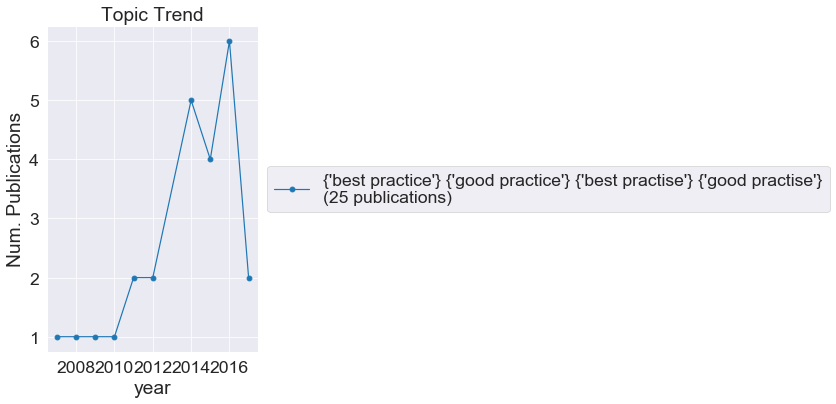

In [30]:
wos_plot.plot_topic_trend([all_bp], save_plot_fn='figs/bp_topic_trend.png')

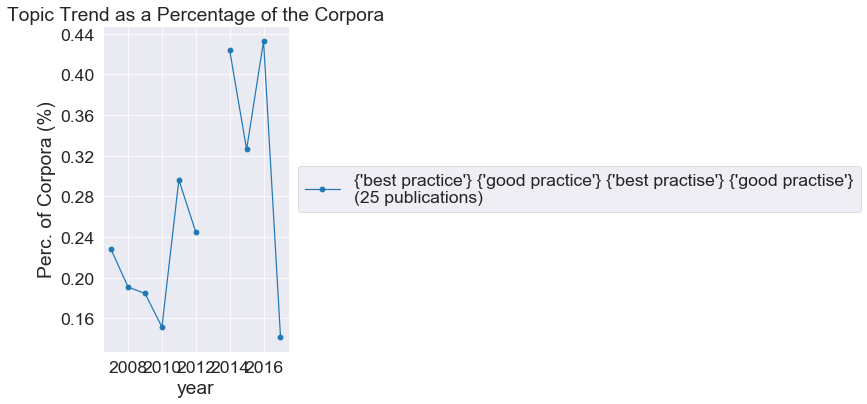

In [31]:
wos_plot.plot_topic_trend([all_bp], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/bp_topic_trend_percentage.png')